<a href="https://colab.research.google.com/github/ZainabBee24/customer-segmentation-kmeans/blob/main/Unsupervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using K-Means Clustering (Unsupervised Learning)

## Objective:
Group customers into segments based on their annual income and spending score using unsupervised learning (K-Means Clustering).

# 🛍️ Customer Segmentation using K-Means Clustering

## Introduction
Understanding customer behavior is critical for businesses aiming to deliver personalized services and targeted marketing. However, in many cases, customer data lacks explicit labels that define distinct customer groups. This project utilizes **unsupervised learning**, specifically **K-Means Clustering**, to identify hidden patterns and group customers into meaningful segments based on their **annual income** and **spending score**.

By clustering customers with similar purchasing behavior, businesses can design focused marketing strategies, improve customer relationship management, and optimize resource allocation. The dataset used for this project consists of demographic and spending information for mall customers. Through data preprocessing, visualization, and clustering, the project demonstrates a practical approach to customer segmentation.

The project is implemented in Python using **Pandas**, **Scikit-learn**, **Matplotlib**, and **Seaborn**.

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Load Dataset

In [ ]:
# Load Dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Data Preprocessing

In [ ]:
#check null values
df.isnull().sum()

#check duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Rename columns to snake_case
df.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
print(df.head())

   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40


## Data Preprocessing Results

The dataset contains **5 columns**: `customer_id`, `gender`, `age`, `annual_income`, and `spending_score`. An initial inspection revealed no missing or duplicated values, ensuring data quality for analysis.

To make the column names coding-friendly, all column names were standardized to lowercase with underscores for consistency and readability.

For clustering purposes, only the **`annual_income`** and **`spending_score`** columns were selected as features, as these variables directly relate to customers' purchasing power and behavior.

The selected features were then **standardized using StandardScaler** to normalize their values and ensure that both features contribute equally to the distance calculations in K-Means Clustering.

The preprocessed data was now ready for applying the K-Means Clustering algorithm.

# Feature Selection and Scaling

In [ ]:
# Select relevant features for clustering
X = df[['annual_income', 'spending_score']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal clusters (elbow method)

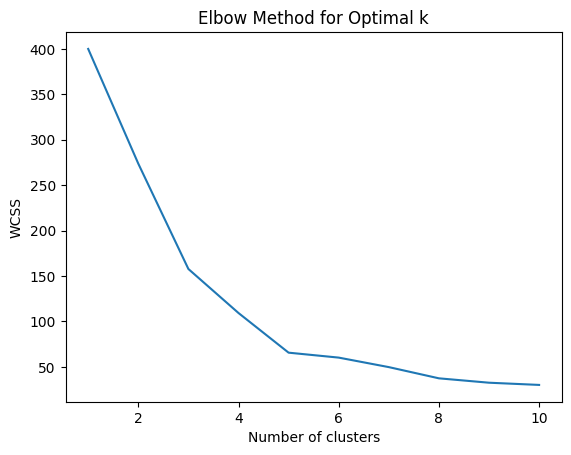

In [ ]:
# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Apply K-Means Clustering

In [ ]:
# Based on Elbow Plot, selected k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters
df.head()

,customer_id,gender,age,annual_income,spending_score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# Visualize Clusters

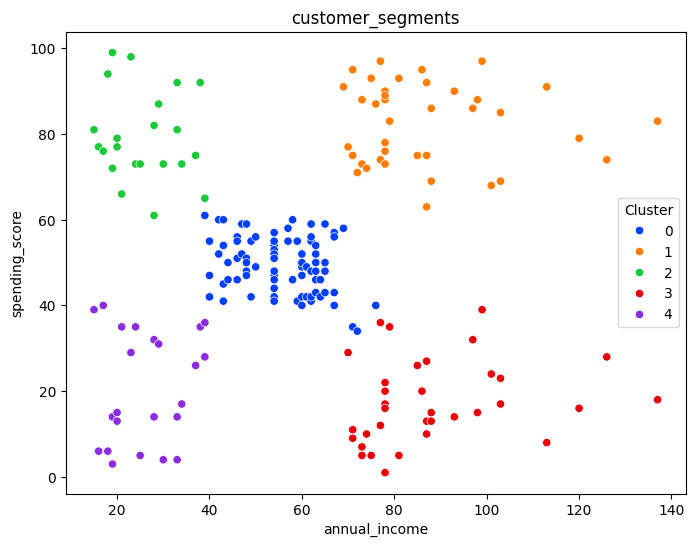

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='annual_income', y='spending_score', hue='Cluster', data=df, palette='bright')
plt.title('customer_segments')
plt.show()

## Clustering Result Interpretation

The K-Means Clustering algorithm successfully segmented the customers into **5 distinct clusters** based on their **annual income** and **spending score**. The scatter plot visualization highlights clear groupings of customers with similar purchasing behaviors.

### Observations:
- **Cluster 0:** High-income customers with moderate spending scores.
- **Cluster 1:** Low-income customers with low spending scores.
- **Cluster 2:** High-income customers with high spending scores — potential premium segment.
- **Cluster 3:** Moderate-income customers with average spending scores.
- **Cluster 4:** Low-income customers with high spending scores — possibly price-sensitive but frequent spenders.

These segments provide valuable insights for business strategies, enabling targeted marketing campaigns, personalized offers, and better resource allocation. The segmentation can also help identify loyal customers and high-value prospects.

While the clusters show meaningful patterns, further segmentation can be explored by incorporating additional demographic factors like age and gender.

## Project Summary
This project applies K-Means Clustering, an unsupervised machine learning algorithm, to segment customers of a retail business based on their annual income and spending scores. By analyzing patterns in the data, the model groups customers into clusters that represent different purchasing behaviors, such as high-income high-spenders, low-income low-spenders, and moderate segments. The segmentation insights can be used by businesses for targeted promotions, loyalty programs, and resource optimization.

## Conclusion
Through the application of K-Means Clustering, five distinct customer segments were identified, each showcasing unique spending behaviors and income profiles. This unsupervised learning approach demonstrates how businesses can leverage data to understand their customer base better and craft tailored marketing strategies. While the clustering provided valuable insights, further analysis incorporating additional demographic and behavioral features could enhance the segmentation’s granularity and business impact.

####Submitted by **Zainab Balarabe Adam.** Generative AI and Data Science Intern (Intermediate)